# Análise de dados - Pandas

Pandas é a queridinha de análise de dados em python por motivos óbvios (e talvez por falta de concorrência?)

## pd.Series

Series são colunas de um dataframe, nada mais. Têm uns métodos próprios como de se esperar mas é mais vantajoso manipular o dataframe completo

## pd.DataFrame

A famosa tabela. Para criar um dataframe à partir de séries precisamos só de passar os parâmetros em um dicionário e pronto.

In [6]:
from IPython.display import display
import pandas as pd

cars = pd.Series(['Peugeot', 'Maserati', 'Shelby'])
colors = pd.Series(['White','Red', 'Blue'])

df = pd.DataFrame({"Cars" : cars, "Colors": colors})

display(df)

,Cars,Colors
0,Peugeot,White
1,Maserati,Red
2,Shelby,Blue


Um dataframe consta com linhas e e colunas:

- axis = 0 -> linhas, eixo x
- axis = 1 -> colunas, eixo y
- O resto é meio óbvio, como a coluna de índices, as colunas de dados e por aí vai

![](pandas-anatomy-of-a-dataframe.png)

> Pandas também pode ler dataframes da web, só passar o link caso os dados estejam em .csv ou formatos aceitos



## Descrevendo e explorando os dados

Normalmente inicia-se o projeto descrevendo os dados que temos no conjunto para avaliar as operações que serão necessárias para visualizar e usar os dados. Exemplo: Uma coluna que deveria ter tipos numéricos pode ser formatada como string ou object nos dados e por aí vai.

In [15]:
car_sales = pd.read_csv('./car-sales.csv')
display(car_sales, car_sales.dtypes, car_sales.index, car_sales.describe())

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

RangeIndex(start=0, stop=10, step=1)

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [14]:
# forma mais sucinta de obter as informações
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


### Loc e Iloc

São bem parecidos mas aqui vão algumas diferenças:

- Loc: localiza pelo número ou nome da coluna com base no índice. Se houver mais de uma linha com o mesmo índice retorna ambos
- Iloc: localiza pelo número à partir da contagem dos elementos


In [17]:
animals = pd.Series(["Monkey", "Gorilla", "Snake"], index=[2,1,2])
display(animals.iloc[2], animals.loc[2]) 

'Snake'

2    Monkey
2     Snake
dtype: object

### Consultas básicas

Pra consultar as ocorrências no dataframe igual à algum valor usa-se a estrutura similar ao dicionário, fazendo a consulta como:

dataframe[dataframe[coluna] == 'dado']

In [18]:
display(car_sales)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [20]:
display(car_sales['Make'] == 'Nissan') # Vai retornar verdadeiro ou falso em quais colunas têm a marca igual à Nissan
display(car_sales[car_sales['Make'] == 'Nissan']) # Vai retornar quais colunas têm a marca igual à Nissan

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9     True
Name: Make, dtype: bool

,Make,Colour,Odometer (KM),Doors,Price
4,Nissan,White,213095,4,"$3,500.00"
9,Nissan,White,31600,4,"$9,700.00"


Crosstab é uma forma de mostrar dados cruzados entre as colunas, como sugerem os nomes

In [21]:
display(pd.crosstab(car_sales['Make'], car_sales['Colour'])) # quantas marcas de cada cor (e vice versa)

Colour,Black,Blue,Green,Red,White
Make,,,,,
BMW,1,0,0,0,0
Honda,0,2,0,1,0
Nissan,0,0,0,0,2
Toyota,0,1,1,0,2


In [23]:
display(pd.crosstab(car_sales['Make'], car_sales['Doors'])) # quantas marcas e suas quantidades de portas

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


Groupby é uma das funções mais usadas que agrupa os dados de acordo com a coluna especificada. Tem muita utilidade e faz bastante coisa então é bom revisar de acordo com a prática

In [26]:
display(car_sales.groupby("Make").mean()) # média dos atributos numéricos das marcas

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

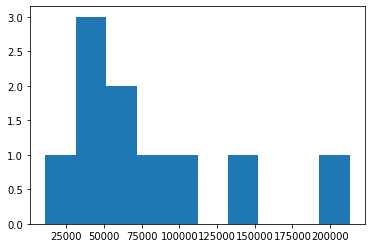

In [36]:
car_sales['Odometer (KM)'].hist(grid=False)

<AxesSubplot:>

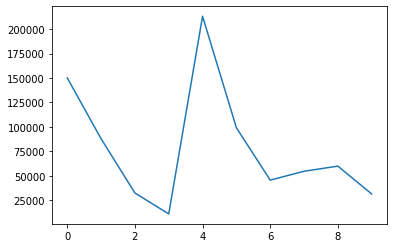

In [37]:
car_sales['Odometer (KM)'].plot()